# MixUp transform in Albumentations

In that transform we create weighted average of original and reference images. Transform also supports global_labels and masks

In [7]:
import random

import cv2
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np
import cv2

import albumentations as A

## Define a function to visualize an image

In [8]:
def visualize(image):
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.imshow(image)

In [62]:
def load_rgb(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Load the image from the disk

In [63]:
img_path = "../images/woman.jpeg"
img = load_rgb(img_path)

In [64]:
class_id = 0

## Visualize the original image

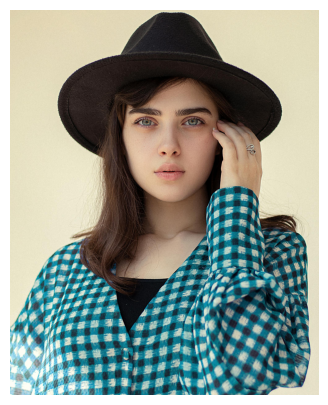

In [65]:
visualize(img)

## Mixup transform

To use transform we need to define reference data that could be any sequence or generator.

We also need to defined `read_fn` that transforms items from `reference_data` to dictionaries with keys: `image`, and optional `global_label`, `mask`.

In [66]:
reference_data = [{
    "image_path": "../images/cat1.jpeg", 
    "class_id": 1},
                  {"image_path": "../images/tiger.jpeg", 
    "class_id": 2}]


In [67]:
def int_to_onehot(value, num_classes):
    """Convert an array of integers to one-hot representation.
    
    Args:
        values (np.ndarray): Array of integers to be converted.
        num_classes (int): Total number of classes, determines the length of one-hot vectors.

    Returns:
        np.ndarray: One-hot encoded representation of `values`.
    """
    # Initialize the one-hot encoded array of shape (num_classes,)
    one_hot = np.zeros(num_classes, dtype=int)
    
    # Set the appropriate index to one
    one_hot[value] = 1
    
    return one_hot

In [68]:
NUM_CLASSES = 5

In [69]:
target_height = 2500
target_width = 1800

In [70]:
# We can process data as we want, including application of augmentations transform.

reference_aug = A.Compose([A.RandomCrop(width=target_width, height=target_height, p=1)], p=1)

In [80]:
def read_fn(item):
    image = load_rgb(item["image_path"])
    
    transformed_image = reference_aug(image=image)["image"]
    
    global_label = int_to_onehot(item["class_id"], NUM_CLASSES)
    return {
        "image": transformed_image,
        "global_label": global_label
    }

## Show reference images

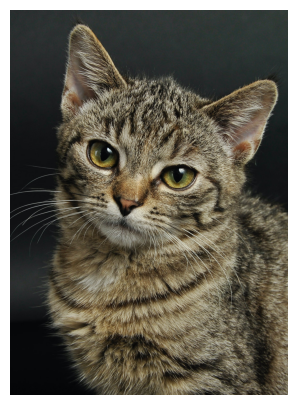

In [81]:
visualize(read_fn(reference_data[0])["image"])

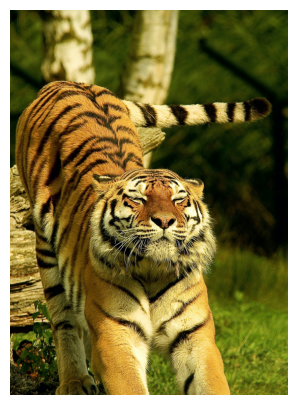

In [82]:
visualize(read_fn(reference_data[1])["image"])

In [83]:
transform = A.Compose([A.RandomCrop(width=target_width, height=target_height, p=1),
                                       A.MixUp(reference_data=reference_data,
                                              read_fn=read_fn, p=1),
                                      A.HorizontalFlip(p=1)], p=1)

In [84]:
original_global_label = int_to_onehot(class_id, NUM_CLASSES)

Global label =  [0.42026364 0.         0.57973636 0.         0.        ]


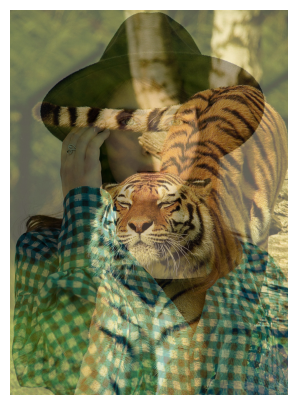

In [103]:
transformed = transform(image=img, global_label=original_global_label)
print("Global label = ", transformed["global_label"])

visualize(transformed["image"])

Global label =  [0.2426094 0.7573906 0.        0.        0.       ]


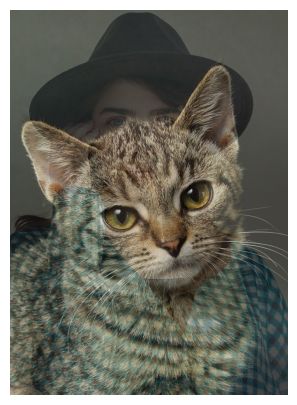

In [101]:
transformed = transform(image=img, global_label=original_global_label)
print("Global label = ", transformed["global_label"])

visualize(transformed["image"])